In [2]:
# Creating helper functions
# Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-02-22 06:11:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-02-22 06:11:54 (64.2 MB/s) - ‘helper_functions.py’ saved [10246/10246]



## In this notebook, we're going to continue to work with smaller subsets of the data, except this time we'll have a look at how we can use: 
* the in-built pretrained models(not in hub but in tensorflow keras itself) within the `tf.keras.applications` module as well as how to fine-tune them to our own custom dataset.
* We'll also practice using a new but similar dataloader function to what we've used before, `image_dataset_from_directory()` which is part of the tf.keras.preprocessing module. (not `image data generator`)

* Finally, we'll also be practicing using the `Keras Functional API` for building deep learning models. The `Functional API` is a more flexible way to create models than the `tf.keras.Sequential API`.



In [3]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2023-02-22 06:12:03--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   144MB/s    in 1.1s    

2023-02-22 06:12:05 (144 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [4]:
# Walk through 10 percent data directory and list number of files
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [5]:
# Create training and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [6]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", # what type are the labels?
                                                                            batch_size=32) # batch_size is 32 by default, this is generally a good number
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical")
# we use categorical not sparse in image loading, labels class are one hot encoded

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [7]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [8]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [9]:
# See an example batch of data
for images, labels in train_data_10_percent.take(1):
  print(images, labels)
# Or if we wanted to see an example batch of data, we could use the take() method.



tf.Tensor(
[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [6.49897842e+01 7.09897842e+01 6.09897804e+01]
   [6.39081688e+01 6.99081650e+01 5.99081688e+01]
   [6.11734810e+01 6.71734772e+01 5.71734810e+01]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [6.39591866e+01 6.99591827e+01 5.79591866e+01]
   [6.59286041e+01 7.19286041e+01 5.99286041e+01]
   [6.23826714e+01 6.83826675e+01 5.63826714e+01]]

  [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   [0.00000000e+00 0.00000000e+00 0.00000000e+00]
   ...
   [6.88520050e+01 7.28520050e+01 5.76836472e+01]
   [6.56275558e+01 6.96275558e+01 5.42856979e+01]
   [6.70102005e+01 7.10102005e+01 5.60153084e+01]]

  ...

  [[8.95969849e+01 8.10918732e+01 4.65306969e+01]
   [7

## Model 0: Building a transfer learning feature extraction model using the Keras Functional API
fnctional API gives our model more flexiblity than sequential model

In [10]:
# # 1. create a base model with tf.keras.application
# base_model=tf.keras.applications.EfficientNetB0(include_top=False)

# # 2. freeze the base model so, prelearned patterns remained
# base_model.trainable=False

# #3. create the input onto the base model
# inputs=tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# #4. if using resnet50v2(trained on scailed data), add this to speed up convergence, no need for efficient net(trained on unscailed data)...how you know when fiting dont converge
# # x=tf.keras.layers.experimental.preprocessing.Rescaling(1/255.)

# #5. pass inputs to the base model(note using tf.keras.applications, efficient net input dont need normalized)
# x=base_model(inputs)

# # check data shape after passing in the base model
# # passing input features through the base model
# print(f"shape after base model: {x.shape}")

# # 6. average pool the outputs of base model, (aggregate the most important info)
# x=tf.keras.layers.GlobalAveragePooling2D()(x)
# print(f"after global avg pooling 2d: {x.shape}")

# # 7. create the output activation layer
# outputs=tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# # 8. combine the inputs with the outputs in the model
# model_0=tf.keras.Model(inputs, outputs)

# #9. compile the model
# model_0.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# # 10. fit the model(we use less step for valdation so, it is faster)
# model_0.fit(train_data_10_percent, 
#             epochs=5, 
#             steps_per_epoch=len(train_data_10_percent), 
#             validation_data=test_data_10_percent,  
#             validation_split=int(0.25*len(test_data_10_percent)), 
#             callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")]
#             )

In [11]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model (so the pre-learned patterns remain)
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model (we use less steps for validation so it's faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_10_percent)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

16705208/16705208 [==============================] - 0s 0us/step


Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230222-061221
Epoch 1/5
24/24 [==============================] - 109s 4s/step - loss: 1.9481 - accuracy: 0.3987 - val_loss: 1.3323 - val_accuracy: 0.7253
Epoch 2/5
24/24 [==============================] - 140s 6s/step - loss: 1.1161 - accuracy: 0.7747 - val_loss: 0.8740 - val_accuracy: 0.8207
Epoch 3/5
24/24 [==============================] - 138s 6s/step - loss: 0.7871 - accuracy: 0.8360 - val_loss: 0.6681 - val_accuracy: 0.8602
Epoch 4/5
24/24 [==============================] - 137s 6s/step - loss: 0.6350 - accuracy: 0.8787 - val_loss: 0.5849 - val_accuracy: 0.8651
Epoch 5/5
24/24 [==============================] - 98s 4s/step - loss: 0.5528 - accuracy: 0.8827 - val_loss: 0.5575 - val_accuracy: 0.8668


In [12]:
# evaluate in full test dataset
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 184s 2s/step - loss: 0.5577 - accuracy: 0.8656


[0.5576916933059692, 0.8655999898910522]

In [13]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)
# look output has rescaling layer so, dont need rescaling for efficient net. look all total layers

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [14]:
base_model.layers

In [15]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [16]:
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


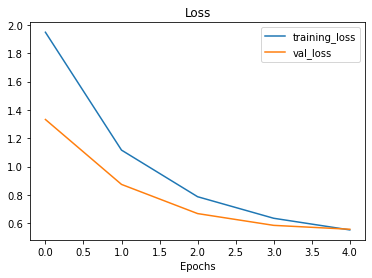

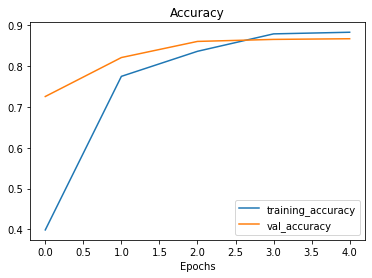

In [17]:
# Check out our model's training curves
plot_loss_curves(history_10_percent)

## Getting a feature vector from a trained model
🤔 Question: What happens with the tf.keras.layers.GlobalAveragePooling2D() layer? I haven't seen it before.

The tf.keras.layers.GlobalAveragePooling2D() layer transforms a 4D tensor into a 2D tensor by averaging the values across the inner-axes.

In [18]:
tf.random.set_seed(42)
a=tf.random.normal([1,4,4,7])
tf.keras.layers.GlobalAveragePooling2D()(a)
# gives vector with dimension(1,7) is called our feature vector and this is feed to last dense layer which is only layer that gets trained and classify. converts tensor to vector. it may be 2D shape but it gives just a vector.

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[ 0.10615583, -0.07545105,  0.1375745 , -0.47763708, -0.21507592,
        -0.28576303, -0.0380312 ]], dtype=float32)>

In [19]:
tf.reduce_mean(a, [1,2])
# replicating avg pool 2D


<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[ 0.10615583, -0.07545105,  0.1375745 , -0.47763708, -0.21507592,
        -0.28576303, -0.0380312 ]], dtype=float32)>

In [20]:
# feature extraction gives feature vector
# feature extraction to extract the feature base model has learned and use it to classify

# getting feature vector/extract feature using max pool 2D

In [21]:
tf.random.set_seed(42)
a=tf.random.normal([1,4,4,7])
tf.keras.layers.GlobalMaxPooling2D()(a)
# gives vector with dimension(1,7) is called our feature vector and this is feed to last dense layer which is only layer that gets trained and classify. converts tensor to vector. it may be 2D shape but it gives just a vector.

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[1.5063847 , 1.6994323 , 1.3617845 , 2.132039  , 1.4612    ,
        0.97772694, 1.8619503 ]], dtype=float32)>

In [22]:
tf.reduce_max(a, [1,2])
# replicating max pool 2D

<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
array([[1.5063847 , 1.6994323 , 1.3617845 , 2.132039  , 1.4612    ,
        0.97772694, 1.8619503 ]], dtype=float32)>

Doing this not only makes the output of the base model compatible with the input shape requirement of our output layer (tf.keras.layers.Dense()), it also condenses the information found by the base model into a lower dimension feature vector.
Note: One of the reasons feature extraction transfer learning is named how it is is because what often happens is a pretrained model outputs a feature vector (a long tensor of numbers, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out of.

## Running a series of transfer learning experiments
* model_1: Use feature extraction transfer learning on 1% of the training data with data augmentation.
* model_2: Use feature extraction transfer learning on 10% of the training data with data augmentation.
* model_3: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
* model_4: Use fine-tuning transfer learning on 100% of the training data with data augmentation.
All experiments will be done using the EfficientNetB0 model within the tf.keras.applications module.
To make sure we're keeping track of our experiments, we'll use our create_tensorboard_callback() function to log all of the model training logs.
We'll construct each model using the Keras Functional API and instead of implementing data augmentation in the ImageDataGenerator class as we have previously, we're going to build it right into the model using the tf.keras.layers.experimental.preprocessing module.

In [23]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

--2023-02-22 06:26:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  79.0MB/s    in 1.6s    

2023-02-22 06:26:45 (79.0 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [24]:
# Walk through 1 percent data directory and list number of files
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'

In [25]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           batch_size=32, # default
                                                                           image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## Adding data augmentation right into the model
Previously we've used the different parameters of the ImageDataGenerator class to augment our training images, this time we're going to build data augmentation right into the model.

How?

Using the `tf.keras.layers.experimental.preprocessing` module and creating a dedicated data augmentation layer.

To use data augmentation right within our model we'll create a Keras Sequential model consisting of only data preprocessing layers, we can then use this Sequential model within another Functional model.

> This a relatively new feature added to TensorFlow 2.2+ but it's very powerful. Adding a data augmentation layer to the model has the following benefits:

* Preprocessing of the images (augmenting them) happens on the GPU rather than on the CPU (much faster).
Images are best preprocessed on the GPU where as text and structured data are more suited to be preprocessed on the CPU.
* Image data augmentation only happens during training so we can still export our whole model and use it elsewhere. And if someone else wanted to train the same model as us, including the same kind of data augmentation, they could.

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
# dont confuse we are still using functional API model but one layers created using one sequential API in it.
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

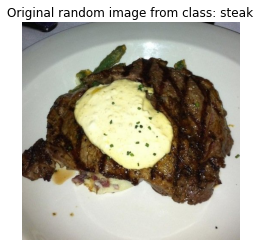

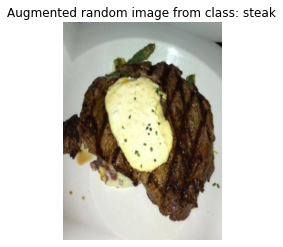

In [27]:

# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
# if its float, it need normalized 0 to 1 to show image else if it is int 0 to 255 range works.
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [28]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer/ gos to data augmentation layer only on training data
x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs )

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), # validate for less steps
                    # Track model training logs
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])
# if it is model you do (x) and if its layer, you do (layer param)(x) 

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230222-062704
Epoch 1/5


3/3 [==============================] - 104s 43s/step - loss: 2.4523 - accuracy: 0.1143 - val_loss: 2.3102 - val_accuracy: 0.1447
Epoch 2/5
3/3 [==============================] - 47s 22s/step - loss: 2.2213 - accuracy: 0.1857 - val_loss: 2.1832 - val_accuracy: 0.2105
Epoch 3/5
3/3 [==============================] - 86s 42s/step - loss: 2.0390 - accuracy: 0.3143 - val_loss: 2.0394 - val_accuracy: 0.2648
Epoch 4/5
3/3 [==============================] - 88s 42s/step - loss: 1.7918 - accuracy: 0.5000 - val_loss: 1.9348 - val_accuracy: 0.3470
Epoch 5/5
3/3 [==============================] - 87s 42s/step - loss: 1.6318 - accuracy: 0.6286 - val_loss: 1.8538 - val_accuracy: 0.3980


In [29]:
# Check out model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

There it is. We've now got data augmentation built right into the our model. This means if we saved it and reloaded it somewhere else, the data augmentation layers would come with it.

The important thing to remember is data augmentation only runs during training. So if we were to evaluate or use our model for inference (predicting the class of an image) the data augmentation layers will be automatically turned off.

To see this in action, let's evaluate our model on the test data.

In [30]:

# Evaluate on the test data
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug
     

79/79 [==============================] - 167s 2s/step - loss: 1.8521 - accuracy: 0.4184


[1.852146863937378, 0.41839998960494995]

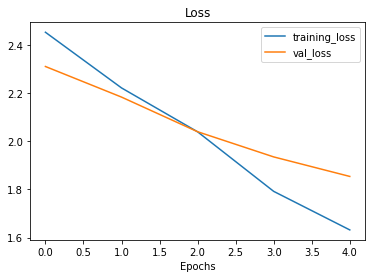

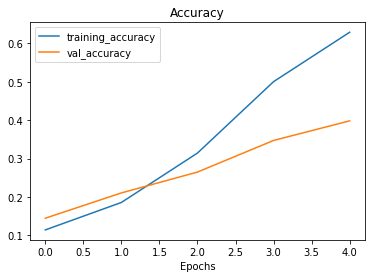

In [31]:

# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_percent)

## Model 2: Feature extraction transfer learning with 10% of data and data augmentation

In [32]:
# Get 10% of the data of the 10 classes (uncomment if you haven't gotten "10_food_classes_10_percent.zip" already)
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# unzip_data("10_food_classes_10_percent.zip")

train_dir_10_percent = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

In [33]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Note: the test data is the same as the previous experiment, we could
# skip creating this, but we'll leave this here to practice.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [34]:
# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
# base model outputs multyi dimensional tensor and we compress it to feature vector using global avg pool2D()
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
# inference mode means all the layers of base model will be in inference model and training gets turned off for them. there weights dont gets updated and this insures batch norm layers dont get updated
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])

* When you set `layer.trainable = False`, the BatchNormalization layer will run in inference mode, and will not update its mean and variance statistics.
* When you unfreeze a model that contains `BatchNormalization` layers in order to do fine-tuning, you should keep the `BatchNormalization` layers in inference mode by passing `training = False` when calling the base model. Otherwise, the updates applied to the non-trainable weights will destroy what the model has learned.

Importantly, batch normalization works differently during training and during inference. our bach norm layers should be always frozen weven if it is part of fine turned layer. In inference model, ayers training gets turned off so,  weights dont gets updated

In [35]:
base_model.summary()
# look for batchnorm layer

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_4 (Rescaling)        (None, None, None,   0           ['input_3[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_4[0][0]']            
 )                              3)                                                   

In [36]:
model_2.summary()
# we havent fit it just yet because we wat to create checkpoint callback

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Creating a ModelCheckpoint callback
save your model, as a whole in the SavedModel format or the weights (patterns) only to a specified directory as it trains.
* This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains. It also means if you think your model could benefit from being trained for longer, you can reload it from a specific checkpoint and continue training from there.
* For example, say you fit a feature extraction transfer learning model for 5 epochs and you check the training curves and see it was still improving and you want to see if fine-tuning for another 5 epochs could help, you can load the checkpoint, unfreeze some (or all) of the base model layers and then continue training.

In [37]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

The SavedModel format saves a model's architecture, weights and training configuration all in one folder. It makes it very easy to reload your model exactly how it is elsewhere. However, if you do not want to share all of these details with others, you may want to save and share the weights only (these will just be large tensors of non-human interpretable numbers). If disk space is an issue, saving the weights only is faster and takes up less space than saving the whole model.

Time to fit the model.

Because we're going to be fine-tuning it later, we'll create a variable initial_epochs and set it to 5 to use later.



In [38]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), 
                                                     checkpoint_callback])
# here new epoch override checkpoint of previous epoch so checkpoint of only last 5th epoch saved

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230222-063822


Epoch 1/5


24/24 [==============================] - ETA: 0s - loss: 1.9767 - accuracy: 0.3640
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 111s 4s/step - loss: 1.9767 - accuracy: 0.3640 - val_loss: 1.4316 - val_accuracy: 0.7007
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2969 - accuracy: 0.6920
Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 146s 6s/step - loss: 1.2969 - accuracy: 0.6920 - val_loss: 0.9903 - val_accuracy: 0.8109
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0052 - accuracy: 0.7573
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 146s 6s/step - loss: 1.0052 - accuracy: 0.7573 - val_loss: 0.7918 - val_accuracy: 0.8158
Epoch 4/5
24/24 [==============================] - ETA: 0s - loss: 0.8517 - accuracy: 0.7853
Epoch 4: sa

In [39]:
model_0.evaluate(test_data)

79/79 [==============================] - 168s 2s/step - loss: 0.5577 - accuracy: 0.8656


[0.5576916933059692, 0.8655999898910522]

In [40]:
# Evaluate on the test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 182s 2s/step - loss: 0.6239 - accuracy: 0.8400


[0.6239118576049805, 0.8399999737739563]

In [40]:
# Plot model loss curves
plot_loss_curves(history_10_percent_data_aug)

To load saved model weights you can use the the `load_weights()` method, passing it the path where your saved weights are stored. We'll be able to test if it saved correctly by evaluting it on the test data. Returns a model to specific check point.


In [41]:
# Load in saved model weights and evaluate model. previous weight in model_2 will be overwrighted by checkpointed weight.
model_2.load_weights(checkpoint_path)
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 214s 3s/step - loss: 0.6239 - accuracy: 0.8400


Now let's compare the results of our previously trained model and the loaded model. These results should very close if not exactly the same. The reason for minor differences comes down to the precision level of numbers calculated.

In [42]:
# If the results from our native model and the loaded weights are the same, this should output True
results_10_percent_data_aug == loaded_weights_model_results

False

If the above cell doesn't output True, it's because the numbers are close but not the exact same (due to how computers store numbers with degrees of precision).

However, they should be very close...

In [43]:
import numpy as np
# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [44]:
# Check the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[-5.96046448e-08  0.00000000e+00]


## 🔑 Note: Fine-tuning usually works best after training a feature extraction model for a few epochs and with large amounts of data. 
* Bottom layers (layers closer to the input data) stay frozen where as top layers (layers closer to the output data) are updated during training in fine tuning.
* So far our saved model has been trained using feature extraction transfer learning.
* fine-tuning transfer learning: using the same base model except we'll be unfreezing some of its layers and running the model for a few more epochs.


## model_3 fine tuning feature extracted model

In [45]:
# Layers in loaded model
model_2.layers

In [47]:
for layer in model_2.layers:
  print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f8c648504c0> True
<keras.engine.sequential.Sequential object at 0x7f8c67569b50> True
<keras.engine.functional.Functional object at 0x7f8c67319670> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7f8c6757da00> True
<keras.layers.core.dense.Dense object at 0x7f8c6722fca0> True


In [58]:
# How many layers are trainable in our base model?
# trainable variable is weight/pattern that can be updated
print(len(model_2.layers[2].trainable_variables)) # layer at index 2 is the EfficientNetB0 layer (the base model)
     

0


In [59]:
#  Above is the same as our base model.
print(len(base_model.trainable_variables))

0


In [60]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [61]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

* Generally, the less data you have, the less layers you want to unfreeze and the more gradually you want to fine-tune.
* 📖 Resource: The ULMFiT (Universal Language Model Fine-tuning for Text Classification) paper has a great series of experiments on fine-tuning models.
* To begin fine-tuning, we'll unfreeze the entire base model by setting its trainable attribute to True. Then we'll refreeze every layer in the base model except for the last 10 by looping through them and setting their trainable attribute to False. Finally, we'll recompile the model.

In [63]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])
     

In [64]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

# last 10 layers of the base model along with the output layer will have their weights updated during training.

> 🤔 Question: Why did we recompile the model?

* Every time you make a change to your models, you need to recompile them.

* In our case, we're using the exact same loss, optimizer and metrics as before, except this time the learning rate for our optimizer will be 10x smaller than before (0.0001 instead of Adam's default of 0.001). because we are updating already learned weight we dont want it updated too much to not let overfit.

* We do this so the model doesn't try to overwrite the existing weights in the pretrained model too fast. In other words, we want learning to be more gradual.

🔑 Note: There's no set standard for setting the learning rate during fine-tuning, though reductions of 2.6x-10x+ seem to work well in practice.


In [69]:
# How many trainable variables do we have now?
print(len(model_2.trainable_variables))
# Wonderful, it looks like our model has a total of 10 trainable variables, the last 10 layers of the base model and the weight and bias parameters of the Dense output layer.

12


In [71]:
model_2.trainable_variables
# we get all the weight fron different trainable layers

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

Wonderful, it looks like our model has a total of 10 trainable variables, the last 10 layers of the base model and the weight and bias parameters of the Dense output layer.

Time to fine-tune!

We're going to continue training on from where our previous model finished. Since it trained for 5 epochs in our feature extraction model, our fine-tuning will begin on the epoch 5 and continue for another 5 epochs.
* because transfer learning workflow, you first train on feature extraction model to train that final output layer to your custom data and then you go backward and start fine tuning other layers.

To do this, we can use the `initial_epoch` parameter of the `fit()` method. We'll pass it the last epoch of the previous model's training history (`history_10_percent_data_aug.epoch[-1]`).

In [76]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start training from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")]) # name experiment appropriately

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230222-081807
Epoch 5/10


24/24 [==============================] - 171s 7s/step - loss: 0.7443 - accuracy: 0.7547 - val_loss: 0.5157 - val_accuracy: 0.8339
Epoch 6/10
24/24 [==============================] - 118s 5s/step - loss: 0.3349 - accuracy: 0.8973 - val_loss: 0.5580 - val_accuracy: 0.8092
Epoch 7/10
24/24 [==============================] - 113s 5s/step - loss: 0.2519 - accuracy: 0.9080 - val_loss: 0.5411 - val_accuracy: 0.8306
Epoch 8/10
24/24 [==============================] - 148s 6s/step - loss: 0.1770 - accuracy: 0.9493 - val_loss: 0.4889 - val_accuracy: 0.8372
Epoch 9/10
24/24 [==============================] - 143s 6s/step - loss: 0.1081 - accuracy: 0.9720 - val_loss: 0.4780 - val_accuracy: 0.8586
Epoch 10/10
24/24 [==============================] - 105s 4s/step - loss: 0.0808 - accuracy: 0.9800 - val_loss: 0.5288 - val_accuracy: 0.8520


In [77]:
history_10_percent_data_aug.epoch[-1]

4

In [78]:
# Evaluate the model on the test data
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 175s 2s/step - loss: 0.5165 - accuracy: 0.8572


# Alright, we need a way to evaluate our model's performance before and after fine-tuning. How about we write a function to compare the before and after?

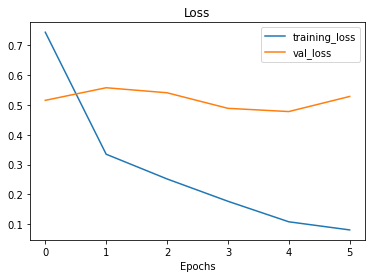

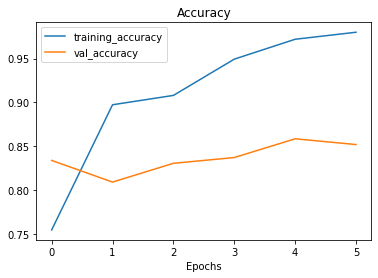

In [79]:
#  it only plot after fine tune 5 epochs and no before fine tuning 5 epochs so, this function need update
plot_loss_curves(history_fine_10_percent_data_aug)

In [80]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.36399999260902405, 0.6919999718666077, 0.7573333382606506, 0.7853333353996277, 0.8119999766349792, 0.7546666860580444, 0.8973333239555359, 0.9079999923706055, 0.9493333101272583, 0.972000002861023, 0.9800000190734863]


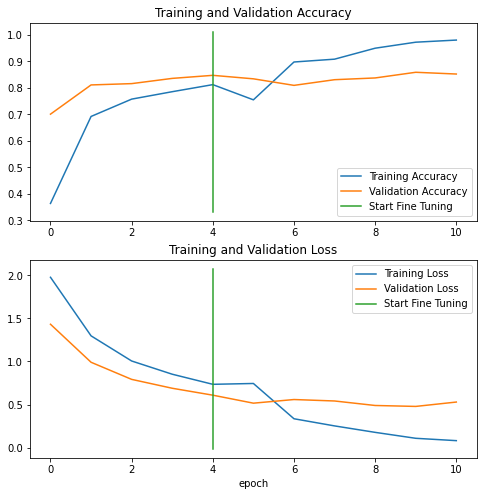

In [82]:
compare_historys(original_history=history_10_percent_data_aug, 
                 new_history=history_fine_10_percent_data_aug, 
                 initial_epochs=5)
# typical fine tune setup, you do feture extraction in one half of epoch first and finetune in other half of epoch

 But remember, it should be noted that fine-tuning usually works best with larger amounts of data. while feature extraction usually works well on lower data.

## Model 4: Fine-tuning an existing model all of the data

In [83]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2023-02-22 08:54:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.128, 142.250.141.128, 2607:f8b0:4023:c0b::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   109MB/s    in 4.1s    

2023-02-22 08:55:02 (120 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [84]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 

And now we'll turn the images into tensors datasets.

In [86]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

# Note: this is the same test dataset we've been using for the previous modelling experiments
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)
     

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


* We've got 10x more images in of the training classes to work with.
* The test dataset is the same we've been using for our previous experiments.
* As it is now, our model_2 has been fine-tuned on 10 percent of the data, so to begin fine-tuning on all of the data and keep our experiments consistent, we need to revert it back to the weights we checkpointed after 5 epochs of feature-extraction.
* To demonstrate this, we'll first evaluate the current model_2.

In [87]:
# Evaluate model (this is the fine-tuned 10 percent of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 280s 4s/step - loss: 0.5165 - accuracy: 0.8572


[0.5165301561355591, 0.857200026512146]

In [88]:
results_fine_tune_10_percent
# same value as above but only difference is small precision

[0.5165301561355591, 0.857200026512146]

# Now we'll revert the model model_2 back to the saved weights to compare two fine tune model and previous fine tuned model stat epochs from the weight saved as checkpoint. for this model also same weight need to be loaded in model 2.

In [92]:
# Now we'll revert the model back to the saved weights(feature extraction version) by loading weight of that feature extraction version i model_2.
# Load model from checkpoint, that way we can fine-tune from the same stage the 10 percent data model was fine-tuned from
# to train a fine tuning model_4, we need to revert model_2 back to feature extraction weight
model_2.load_weights(checkpoint_path) # revert model back to saved weights

ValueError: ignored

In [93]:
# After loading the weights, this should have gone down (no fine-tuning)
model_2.evaluate(test_data)

79/79 [==============================] - 228s 3s/step - loss: 0.6239 - accuracy: 0.8400


[0.6239119172096252, 0.8399999737739563]

In [94]:
# Check to see if the above two results are the same (they should be)
results_10_percent_data_aug

[0.6239118576049805, 0.8399999737739563]

Alright, the previous steps might seem quite confusing but all we've done is:

* Trained a feature extraction transfer learning model for 5 epochs on 10% of the data (with all base model layers frozen) and saved the model's weights using ModelCheckpoint.
* Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen.
* Saved the results and training logs each time.
* Reloaded the model from 1 to do the same steps as 2 but with all of the data.
The same steps as 2?

Yeah, we're going to fine-tune the last 10 layers of the base model with the full dataset for another 5 epochs but first let's remind ourselves which layers are trainable.

In [95]:
# Check which layers are tuneable in the whole model
for layer_number, layer in enumerate(model_2.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [96]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

Looking good! The last 10 layers are trainable (unfrozen).

We've got one more step to do before we can begin fine-tuning.

Do you remember what it is?

I'll give you a hint. We just reloaded the weights to our model and what do we need to do every time we make a change to our models?

Recompile them!

In [97]:
# Compile
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), # divide learning rate by 10 for fine-tuning
                metrics=["accuracy"])

In [98]:
# Continue to train and fine-tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                           epochs=fine_tune_epochs,
                                           initial_epoch=history_10_percent_data_aug.epoch[-1],
                                           validation_data=test_data,
                                           validation_steps=int(0.25 * len(test_data)),
                                           callbacks=[create_tensorboard_callback("transfer_learning", "full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230222-092357
Epoch 5/10


235/235 [==============================] - 814s 3s/step - loss: 0.6255 - accuracy: 0.7967 - val_loss: 0.2679 - val_accuracy: 0.9128
Epoch 6/10
235/235 [==============================] - 809s 3s/step - loss: 0.4184 - accuracy: 0.8661 - val_loss: 0.2916 - val_accuracy: 0.8980
Epoch 7/10
235/235 [==============================] - 753s 3s/step - loss: 0.3451 - accuracy: 0.8856 - val_loss: 0.2551 - val_accuracy: 0.9095
Epoch 8/10
235/235 [==============================] - 809s 3s/step - loss: 0.2763 - accuracy: 0.9099 - val_loss: 0.2320 - val_accuracy: 0.9062
Epoch 9/10
235/235 [==============================] - 784s 3s/step - loss: 0.2342 - accuracy: 0.9200 - val_loss: 0.3543 - val_accuracy: 0.8783
Epoch 10/10
235/235 [==============================] - 767s 3s/step - loss: 0.2190 - accuracy: 0.9292 - val_loss: 0.2845 - val_accuracy: 0.9030


In [99]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 204s 3s/step - loss: 0.3219 - accuracy: 0.8984


[0.32190704345703125, 0.8984000086784363]

5
11
[0.36399999260902405, 0.6919999718666077, 0.7573333382606506, 0.7853333353996277, 0.8119999766349792, 0.79666668176651, 0.8661333322525024, 0.8855999708175659, 0.9098666906356812, 0.9200000166893005, 0.9291999936103821]


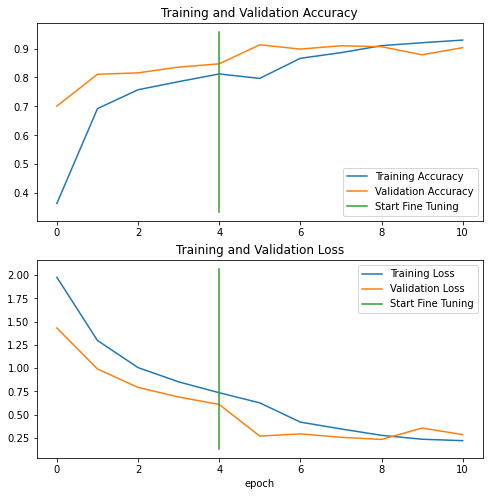

In [100]:
# How did fine-tuning go with more data?
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

## Viewing our experiment data on TensorBoard

Right now our experimental results are scattered all throughout our notebook. If we want to share them with someone, they'd be getting a bunch of different graphs and metrics... not a fun time.

But guess what?

Thanks to the TensorBoard callback we made with our helper function create_tensorflow_callback(), we've been tracking our modelling experiments the whole time.

How about we upload them to TensorBoard.dev and check them out?

We can do with the tensorboard dev upload command and passing it the directory where our experiments have been logged.

🔑 Note: Remember, whatever you upload to TensorBoard.dev becomes public. If there are training logs you don't want to share, don't upload them.

In [ ]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning" \
  --one_shot # exits the uploader when upload has finished

Once we've uploaded the results to TensorBoard.dev we get a shareable link we can use to view and compare our experiments and share our results with others if needed.

🤔 Question: Which model performed the best? Why do you think this is? How did fine-tuning go?

To find all of your previous TensorBoard.dev experiments using the command tensorboard dev list.

In [104]:
# View previous experiments
!tensorboard dev list

2023-02-22 12:01:36.734004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 12:01:36.734139: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-22 12:01:36.734164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
2023-02-22 12:01:39.102580: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to c

And if you want to remove a previous experiment (and delete it from public viewing) you can use the command:

tensorboard dev delete --experiment_id [INSERT_EXPERIMENT_ID_TO_DELETE]```

In [ ]:
# Remove previous experiments
# !tensorboard dev delete --experiment_id OUbW0O3pRqqQgAphVBxi8Q

https://tensorboard.dev/experiment/QFZHV0BMS8uyERUxPOfMNg/